### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
import tensorflow as tf
import xgboost as xgb
from tensorflow import keras

#### Dataset 
**Title**: EMG All features labelled dataset\
**Description**: The dataset consists of time-series EMG signals recorded from different muscles of the human body, along with associated labels indicating the corresponding muscle activity or motion.\
**Link**:       https://www.kaggle.com/datasets/nccvector/electromyography-emg-dataset

In [2]:
df = pd.read_csv('emg_all_features_labeled.csv')
raw = pd.read_csv('index_finger_motion_raw.csv')
print(df.shape, raw.shape)

(6822, 81) (223793, 8)


### Data Exploration

In [3]:
df.head()

,0.029437,0.051465,0.089432,0.016893,0.014127,0.017735,0.019645,0.014079,0.030692,0.052209,...,2.3516,2,3,6,0,0.1,1,1.1,0.2,1.2
0,0.035060,0.025699,0.025286,0.020039,0.012505,0.016996,0.017674,0.014974,0.036073,0.027496,...,2.3906,3,2,2,2,0,0,1,1,1
1,0.043982,0.033187,0.071985,0.018900,0.016712,0.025793,0.025291,0.020268,0.044961,0.034351,...,2.7813,3,2,4,0,1,2,1,2,1
2,0.032677,0.031038,0.033345,0.020213,0.016290,0.028113,0.027834,0.019944,0.033778,0.032369,...,2.4141,2,1,1,0,0,2,2,1,1
3,0.032101,0.029580,0.035939,0.037279,0.014564,0.022579,0.018042,0.015792,0.033035,0.030936,...,2.3516,2,1,6,4,0,1,0,0,1
4,0.034332,0.029158,0.027977,0.025456,0.015080,0.023670,0.025631,0.018851,0.035562,0.030472,...,2.6641,2,2,1,2,0,2,2,2,1


In [4]:
df.describe()

,0.029437,0.051465,0.089432,0.016893,0.014127,0.017735,0.019645,0.014079,0.030692,0.052209,...,2.3516,2,3,6,0,0.1,1,1.1,0.2,1.2
count,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,...,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000
mean,0.040823,0.065489,0.097874,0.036480,0.024884,0.045121,0.099462,0.054163,0.042424,0.066619,...,8.709442,2.051305,3.880094,4.994723,1.738053,0.733656,2.194811,4.317942,2.604955,3.847112
std,0.039008,0.055671,0.098010,0.029872,0.017541,0.044636,0.109739,0.066580,0.038112,0.054745,...,11.202169,2.727362,3.367661,3.830100,2.516240,1.432499,2.544202,4.110435,3.412000,1.962840
min,0.006165,0.006814,0.006432,0.006443,0.006949,0.006798,0.006615,0.006122,0.010712,0.011779,...,0.945310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.015790,0.027960,0.034170,0.017518,0.013873,0.019946,0.019318,0.014736,0.018266,0.029564,...,2.421900,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.027571,0.050213,0.059132,0.025909,0.020272,0.031550,0.052236,0.026368,0.029022,0.051035,...,4.085900,1.000000,3.000000,5.000000,0.000000,0.000000,1.000000,3.000000,1.000000,4.000000
75%,0.049174,0.084064,0.122622,0.046268,0.030887,0.053941,0.139770,0.063585,0.049878,0.084332,...,9.753900,3.000000,6.000000,8.000000,3.000000,1.000000,4.000000,8.000000,4.000000,5.000000
max,0.309780,0.419220,0.487810,0.245450,0.221130,0.459510,0.548000,0.432420,0.308750,0.417830,...,78.719000,13.000000,14.000000,14.000000,13.000000,11.000000,14.000000,14.000000,14.000000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822 entries, 0 to 6821
Data columns (total 81 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   0.029437     6822 non-null   float64
 1   0.051465     6822 non-null   float64
 2   0.089432     6822 non-null   float64
 3   0.016893     6822 non-null   float64
 4   0.014127     6822 non-null   float64
 5   0.017735     6822 non-null   float64
 6   0.019645     6822 non-null   float64
 7   0.014079     6822 non-null   float64
 8   0.030692     6822 non-null   float64
 9   0.052209     6822 non-null   float64
 10  0.08977      6822 non-null   float64
 11  0.019609     6822 non-null   float64
 12  0.016973     6822 non-null   float64
 13  0.020182     6822 non-null   float64
 14  0.021575     6822 non-null   float64
 15  0.017081     6822 non-null   float64
 16  -0.16406     6822 non-null   float64
 17  -0.28906     6822 non-null   float64
 18  -0.53906     6822 non-null   float64
 19  -0.054

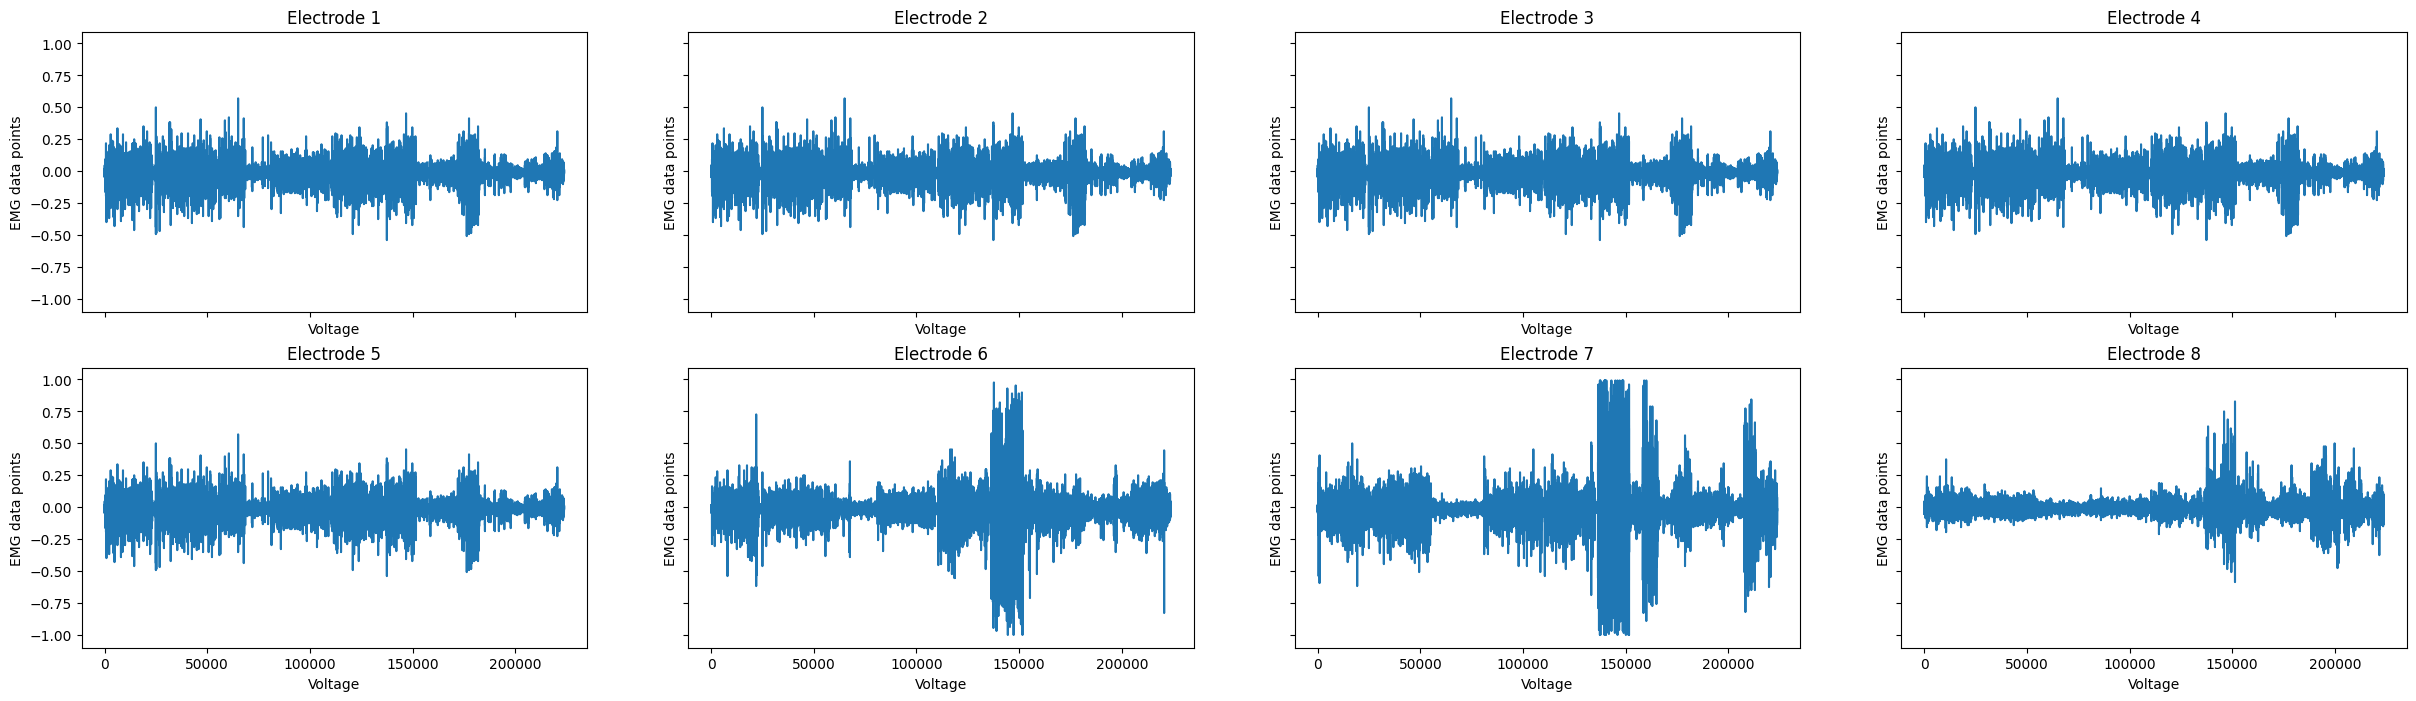

In [6]:
def plot_data(data):    
    fig, axes = plt.subplots(2,4, figsize=(30, 8), sharex=True, sharey=True)
    for i in range(2):
        for j in range(4):
            axes[i][j].plot(data.iloc[:,i*j])
            axes[i][j].set_title('Electrode ' + str(i*4 + j + 1))
            axes[i][j].set_xlabel('Voltage')
            axes[i][j].set_ylabel('EMG data points')

        
plot_data(raw)


### Inferences from the Graph
1. Sharp spikes or points in an EMG plot can indicate the activation of a muscle or group of muscles. When a muscle contracts, it generates an electrical signal that is recorded by the EMG electrodes. This signal appears as a sharp spike or point in the EMG plot.
2. The size and shape of the spike can provide information about the strength and duration of the muscle contraction. A larger and longer spike typically indicates a stronger and more sustained muscle contraction.
3. Sharp spikes or points in an EMG plot can also be caused by noise or interference in the recording system, or by movement artifacts.


### Splitting the dataset into train and test set

In [7]:
x = df.iloc[:,:80].copy()
y = df.iloc[:,80].copy()
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

(6822, 80)
(6822,)


In [8]:
y.value_counts()

4    1084
3    1045
1    1039
2    1017
5    1016
7     895
6     726
Name: 1.2, dtype: int64

### Feature Scaling

In [9]:
SC = StandardScaler()
x_train = pd.DataFrame(SC.fit_transform(x_train))
x_test = pd.DataFrame(SC.transform(x_test))

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [11]:
evalset = [(x_train, y_train), (x_test,y_test)]

In [12]:
# Mean Squared Error (MSE)
def mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

# Root Mean Squared Error (RMSE)
def rmse(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return rmse

# Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def mape(y_true, y_pred):
    non_zero_indices = y_true != 0  # Exclude zero values
    mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    return mape

### Random Forest


In [13]:
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)

In [14]:
model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [15]:
y_pred = model_RF.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy for RF: %.2f%%" % (accuracy_rf * 100.00))

Accuracy for RF: 94.37%


In [16]:
y_true = np.array(y_test)

In [17]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [18]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [19]:
results = pd.DataFrame(pd.DataFrame([['Random Forest', acc, f1, prec, rec,mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [20]:
results

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,Random Forest,0.943728,0.945472,0.946253,0.945656,0.403283,0.635045,0.131301,5.331511


In [21]:
cm_rf = confusion_matrix(y_true, y_pred)

In [22]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       243
           1       0.93      0.91      0.92       233
           2       0.97      0.95      0.96       265
           3       0.91      0.95      0.93       280
           4       0.97      0.89      0.93       266
           5       0.98      1.00      0.99       197
           6       0.97      0.96      0.97       222

    accuracy                           0.94      1706
   macro avg       0.95      0.95      0.95      1706
weighted avg       0.94      0.94      0.94      1706



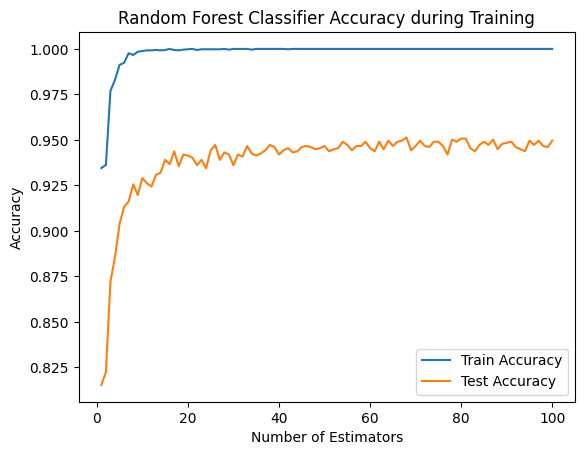

In [23]:
# Plot the accuracy graph
n_estimators = range(1, 101)  # Number of estimators to plot
train_accuracy = []
test_accuracy = []

for n in n_estimators:
    model_rf = RandomForestClassifier(n_estimators=n)
    model_rf.fit(x_train, y_train)
    y_train_pred = model_rf.predict(x_train)
    y_test_pred = model_rf.predict(x_test)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.plot(n_estimators, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy during Training')
plt.legend()
plt.show()

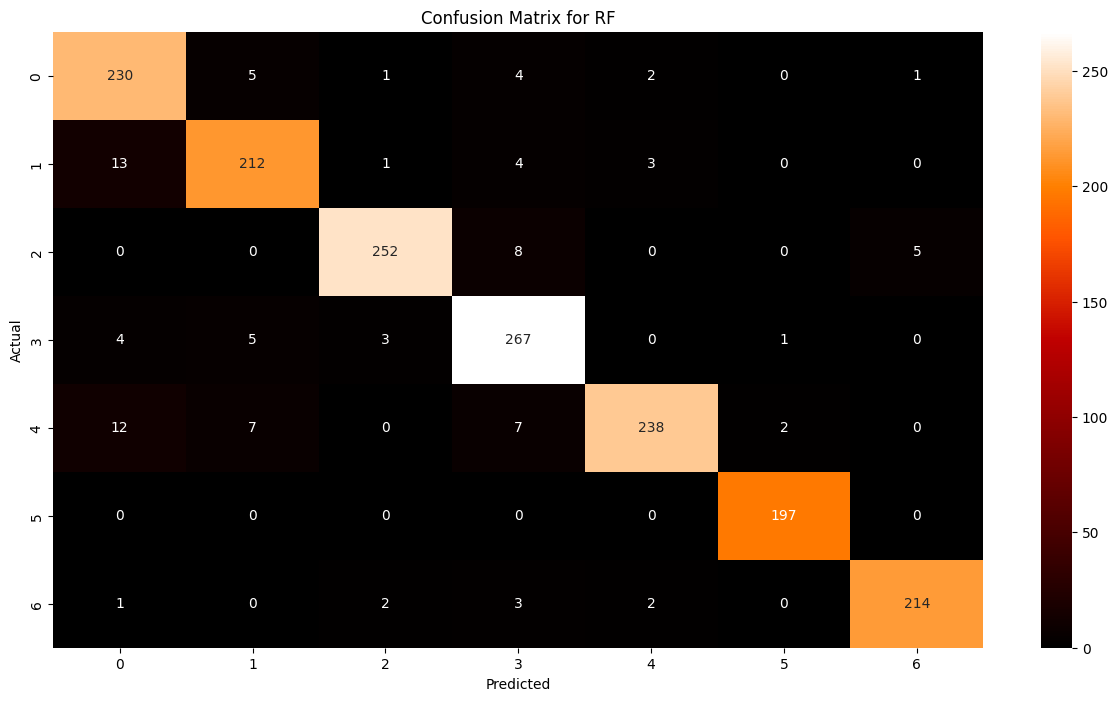

In [24]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RF")
plt.show()

### XGB Classifier

In [25]:
model_XGB = xgb.XGBClassifier()

In [26]:
model_XGB.fit(x_train, y_train, eval_metric='merror', eval_set=evalset, verbose=False)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [27]:
y_pred = model_XGB.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy for XGB: %.2f%%" % (accuracy_xgb * 100.00))

Accuracy for XGB: 94.67%


In [28]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [29]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [30]:
result_xgb = pd.DataFrame(pd.DataFrame([['XGB Classifier', acc, f1, prec, rec, mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [31]:
result_xgb

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,XGB Classifier,0.946659,0.948608,0.948954,0.94863,0.434936,0.659496,0.135991,4.984051


In [32]:
results= pd.concat([results, result_xgb], ignore_index= True)

In [33]:
accuracy_results = model_XGB.evals_result()
train_accuracy = accuracy_results['validation_0']['merror']
test_accuracy = accuracy_results['validation_1']['merror']

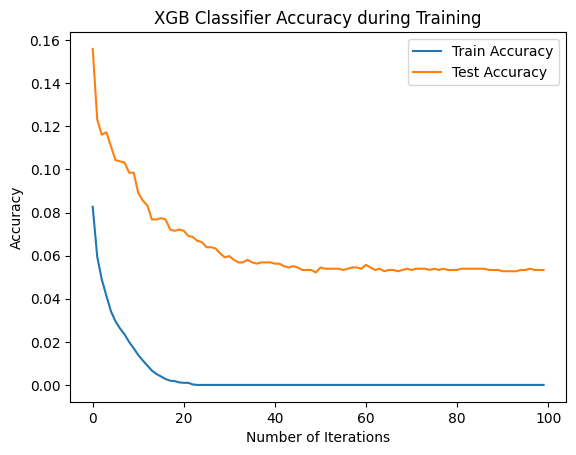

In [34]:
# Plot the accuracy graph
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('XGB Classifier Accuracy during Training')
plt.legend()
plt.show()

In [35]:
cm_xgb = confusion_matrix(y_true, y_pred)

In [36]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       243
           1       0.93      0.93      0.93       233
           2       0.97      0.97      0.97       265
           3       0.93      0.95      0.94       280
           4       0.94      0.90      0.92       266
           5       1.00      1.00      1.00       197
           6       0.98      0.96      0.97       222

    accuracy                           0.95      1706
   macro avg       0.95      0.95      0.95      1706
weighted avg       0.95      0.95      0.95      1706



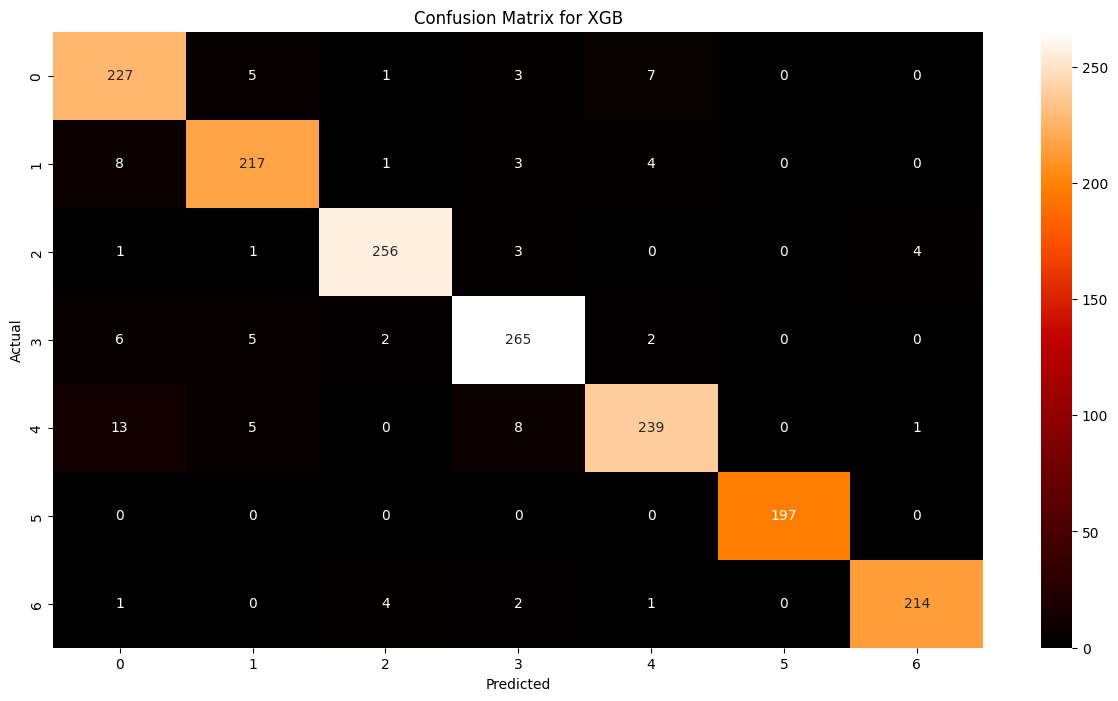

In [37]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGB")
plt.show()

### SVM Classifier


In [38]:
model_SVM = svm.SVC(kernel='linear')

In [39]:
model_SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [40]:
y_pred = model_SVM.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy for SVM: %.2f%%" % (accuracy_svm * 100.00))

Accuracy for SVM: 88.86%


In [41]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [42]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [43]:
results_svm = pd.DataFrame(pd.DataFrame([['SVM Classifier', acc, f1, prec, rec,mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [44]:
results_svm

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,SVM Classifier,0.888628,0.892456,0.89514,0.892235,1.0,1.0,0.300117,10.987697


In [45]:
results= pd.concat([results, results_svm], ignore_index= True)

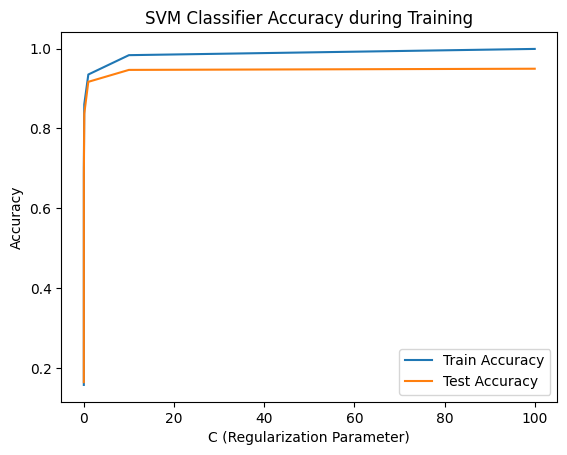

In [46]:
# Plot the accuracy graph
C_values = [0.001, 0.01, 0.1, 1, 10, 100]  # Values of C to plot
train_accuracy = []
test_accuracy = []

for C in C_values:
    model_svm = svm.SVC(C=C)
    model_svm.fit(x_train, y_train)
    y_train_pred = model_svm.predict(x_train)
    y_test_pred = model_svm.predict(x_test)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.plot(C_values, train_accuracy, label='Train Accuracy')
plt.plot(C_values, test_accuracy, label='Test Accuracy')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('SVM Classifier Accuracy during Training')
plt.legend()
plt.show()

In [47]:
cm_svm = confusion_matrix(y_true, y_pred)

In [48]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78       243
           1       0.87      0.84      0.85       233
           2       0.97      0.95      0.96       265
           3       0.86      0.89      0.88       280
           4       0.91      0.79      0.85       266
           5       0.98      0.99      0.98       197
           6       0.95      0.93      0.94       222

    accuracy                           0.89      1706
   macro avg       0.90      0.89      0.89      1706
weighted avg       0.89      0.89      0.89      1706



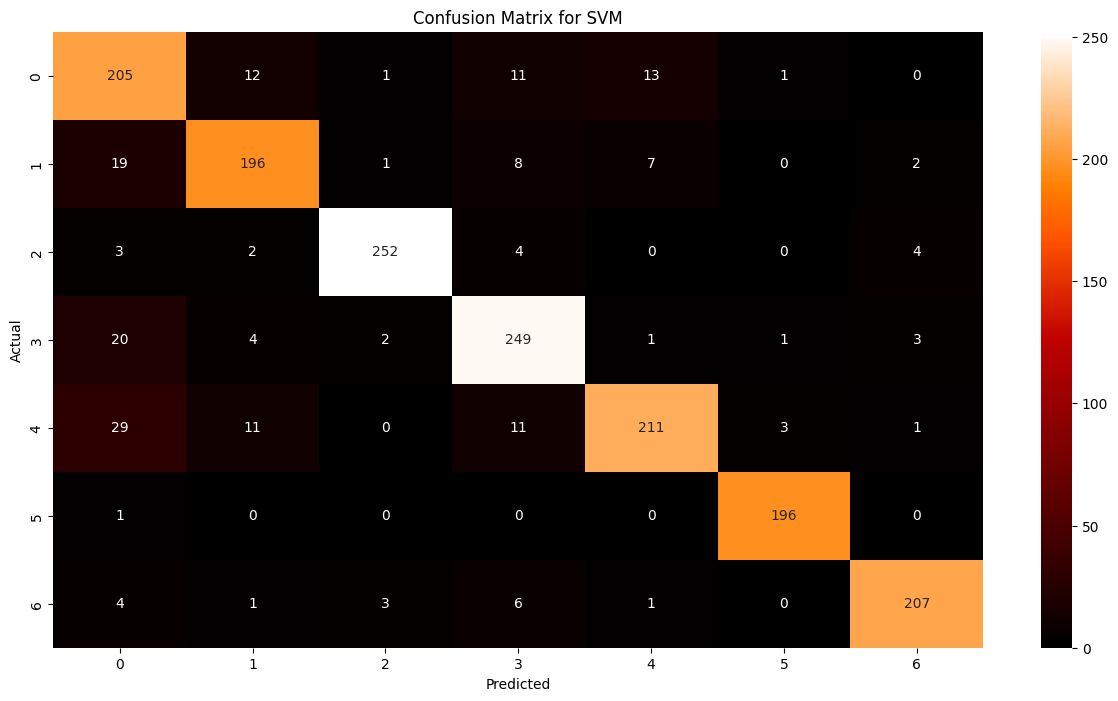

In [49]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM")
plt.show()

### GNB Classifier


In [50]:
model_GNB = GaussianNB()

In [51]:
model_GNB.fit(x_train, y_train)

GaussianNB()

In [52]:
y_pred = model_GNB.predict(x_test)
accuracy_gnb = accuracy_score(y_test, y_pred)
print("Accuracy for GNB: %.2f%%" % (accuracy_gnb * 100.00))

Accuracy for GNB: 58.26%


In [53]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='micro')
prec = precision_score(y_test,y_pred,average='micro')
rec = recall_score(y_test,y_pred,average='micro')

In [54]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [55]:
results_gnb = pd.DataFrame(pd.DataFrame([['GNB Classifier', acc, f1, prec, rec, mse_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [56]:
results_gnb

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,GNB Classifier,0.582649,0.582649,0.582649,0.582649,4.087339,2.021717,1.210434,46.547049


In [57]:
results= pd.concat([results, results_gnb], ignore_index= True)

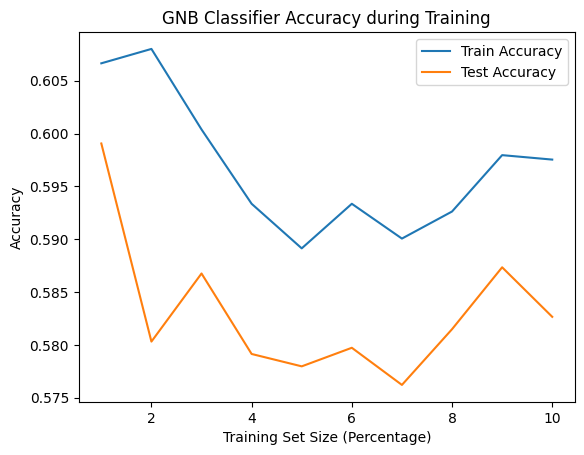

In [58]:
# Plot the accuracy graph
train_accuracy = []
test_accuracy = []

# Train the model with different training set sizes
for i in range(1, 11):
    train_size = int(len(x_train) * (i / 10))
    x_train_subset = x_train[:train_size]
    y_train_subset = y_train[:train_size]
    model_GNB.fit(x_train_subset, y_train_subset)
    y_train_pred = model_GNB.predict(x_train_subset)
    y_test_pred = model_GNB.predict(x_test)
    train_accuracy.append(accuracy_score(y_train_subset, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.plot(range(1, 11), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 11), test_accuracy, label='Test Accuracy')
plt.xlabel('Training Set Size (Percentage)')
plt.ylabel('Accuracy')
plt.title('GNB Classifier Accuracy during Training')
plt.legend()
plt.show()

In [59]:
cm_gnb = confusion_matrix(y_true, y_pred)

In [60]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.26      0.28       243
           1       0.60      0.39      0.47       233
           2       0.78      0.75      0.76       265
           3       0.57      0.36      0.44       280
           4       0.42      0.73      0.53       266
           5       0.89      0.94      0.91       197
           6       0.67      0.73      0.70       222

    accuracy                           0.58      1706
   macro avg       0.60      0.59      0.59      1706
weighted avg       0.59      0.58      0.57      1706



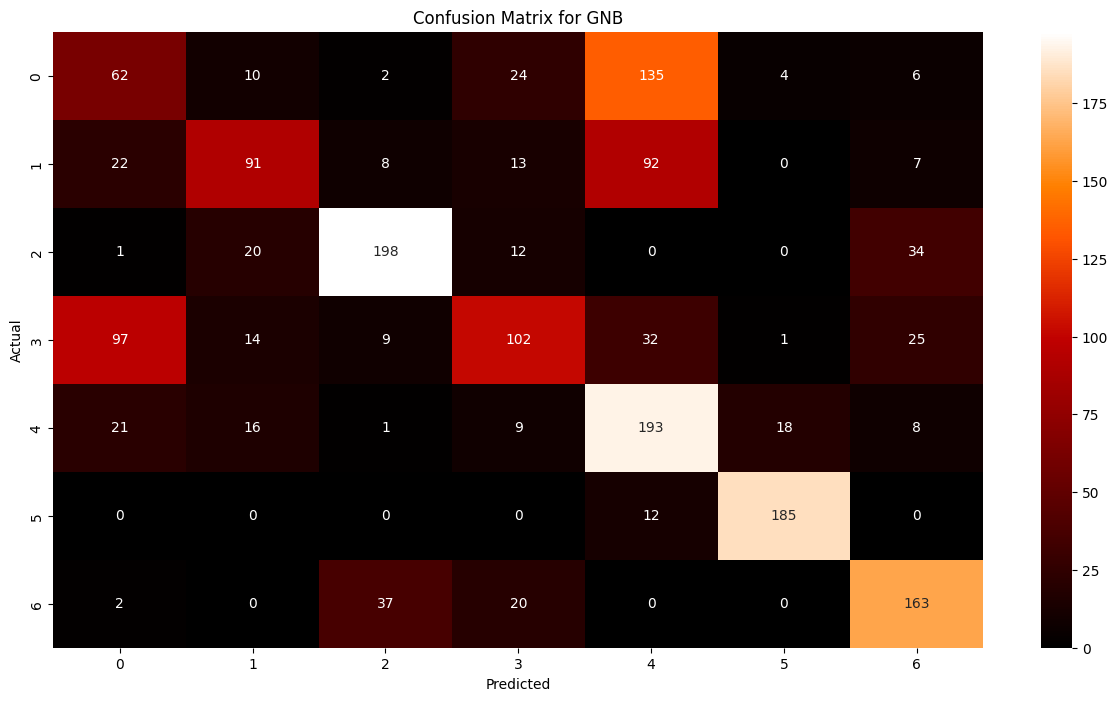

In [61]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_gnb, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GNB")
plt.show()

### KNN Classifier

In [62]:
# Create the KNN classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

In [63]:
# Fit the classifier to the training data
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [64]:
# Predict the labels of the test data
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy for KNN: %.2f%%" % (accuracy_knn * 100.00))

Accuracy for KNN: 94.26%


In [65]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [66]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [67]:
results_knn = pd.DataFrame(pd.DataFrame([['KNN Classifier', acc, f1, prec, rec,mae_val,rmse_val,mae_val,mape_val]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [68]:
results_knn

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,KNN Classifier,0.942556,0.943727,0.944344,0.944003,0.14068,0.663042,0.14068,5.052404


In [69]:
results= pd.concat([results, results_knn], ignore_index= True)

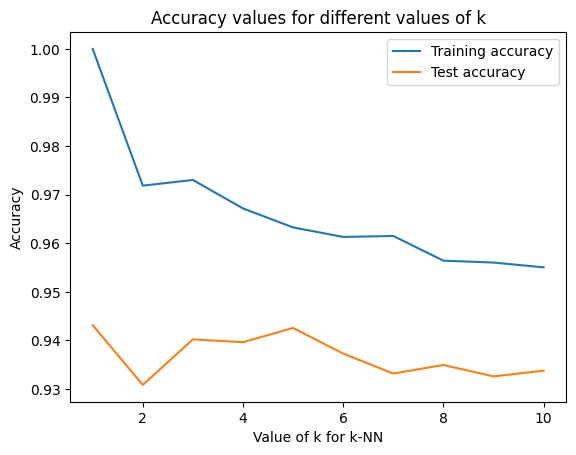

In [70]:
# Vary k from 1 to 10
k_values = range(1, 11)

# Calculate accuracy for each k on training and test sets
train_accuracies = []
test_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Calculate accuracy on training data
    y_train_pred = knn.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate accuracy on test data
    y_test_pred = knn.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot the accuracy values for each k on training and test sets
plt.plot(k_values, train_accuracies, label='Training accuracy')
plt.plot(k_values, test_accuracies, label='Test accuracy')
plt.xlabel('Value of k for k-NN')
plt.ylabel('Accuracy')
plt.title('Accuracy values for different values of k')
plt.legend()
plt.show()

In [71]:
cm_knn  = confusion_matrix(y_true,y_pred)

In [72]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       243
           1       0.90      0.91      0.90       233
           2       0.98      0.99      0.98       265
           3       0.94      0.96      0.95       280
           4       0.95      0.87      0.91       266
           5       0.98      1.00      0.99       197
           6       1.00      0.95      0.97       222

    accuracy                           0.94      1706
   macro avg       0.94      0.94      0.94      1706
weighted avg       0.94      0.94      0.94      1706



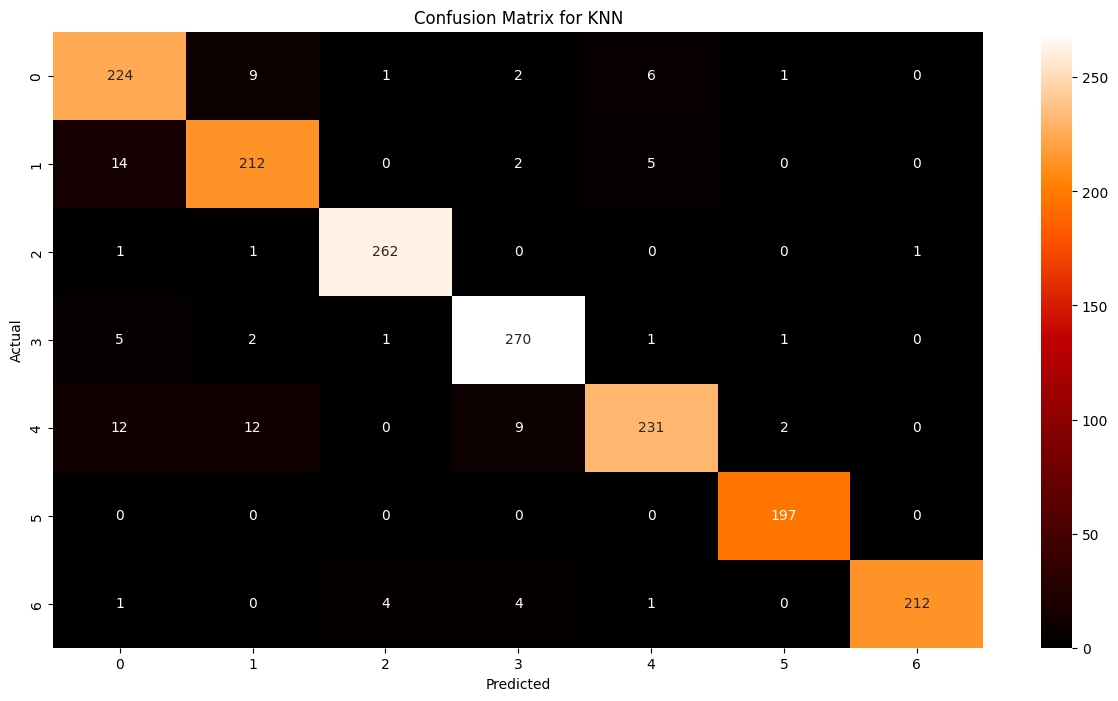

In [73]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN")
plt.show()

### CNN Classifier

In [74]:
x_train = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [76]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(80,1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=8, activation='softmax')
])

In [77]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
history = model.fit(x_train, keras.utils.to_categorical(y_train), epochs=20, batch_size=32, 
validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
171/171 [==============================] - 4s 12ms/step - loss: 1.0802 - accuracy: 0.6461 - val_loss: 0.6464 - val_accuracy: 0.7795
Epoch 2/20
171/171 [==============================] - 2s 9ms/step - loss: 0.6126 - accuracy: 0.7803 - val_loss: 0.5075 - val_accuracy: 0.8242
Epoch 3/20
171/171 [==============================] - 2s 9ms/step - loss: 0.5302 - accuracy: 0.8096 - val_loss: 0.5261 - val_accuracy: 0.8073
Epoch 4/20
171/171 [==============================] - 1s 8ms/step - loss: 0.4712 - accuracy: 0.8329 - val_loss: 0.4965 - val_accuracy: 0.8293
Epoch 5/20
171/171 [==============================] - 2s 10ms/step - loss: 0.4553 - accuracy: 0.8430 - val_loss: 0.4139 - val_accuracy: 0.8498
Epoch 6/20
171/171 [==============================] - 2s 10ms/step - loss: 0.3975 - accuracy: 0.8622 - val_loss: 0.3918 - val_accuracy: 0.8615
Epoch 7/20
171/171 [==============================] - 2s 10ms/step - loss: 0.3786 - accuracy: 0.8657 - val_loss: 0.4330 - val_accuracy: 0.8454
Ep

In [79]:
test_loss, test_acc = model.evaluate(x_test, keras.utils.to_categorical(y_test))
print('Accuracy for CNN:', test_acc)

43/43 [==============================] - 0s 3ms/step - loss: 0.2679 - accuracy: 0.9077
Accuracy for CNN: 0.9076923131942749


In [80]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_test = np.argmax(keras.utils.to_categorical(y_test), axis=-1)

43/43 [==============================] - 0s 4ms/step


In [81]:
y_true = np.array(y_test)

In [82]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [83]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [84]:
results_cnn = pd.DataFrame(pd.DataFrame([['CNN Classifier', acc, f1, prec, rec,mse_val,rmse_val,mae_val,mape_val]],
columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [85]:
results_cnn

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,CNN Classifier,0.907692,0.910437,0.911402,0.910319,0.719414,0.848183,0.222711,10.312925


In [86]:
results= pd.concat([results, results_cnn], ignore_index=True)

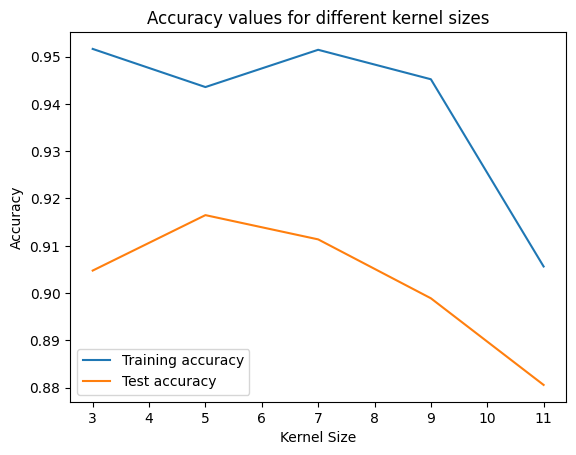

In [87]:
from keras.utils import to_categorical

# Convert target outputs to one-hot encoded format
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Define the range of kernel sizes for the CNN
kernel_sizes = range(3, 13, 2)

# Calculate accuracy for each kernel size on training and test sets
train_accuracies = []
test_accuracies = []

for kernel_size in kernel_sizes:

    # Define the CNN model
    model = keras.models.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(80,1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=8, activation='softmax')
])
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(x_train, y_train_encoded, epochs=20, batch_size=32, verbose=0)
    
    # Evaluate the model on training data
    train_loss, train_accuracy = model.evaluate(x_train, y_train_encoded, verbose=0)
    train_accuracies.append(train_accuracy)
    
    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
    test_accuracies.append(test_accuracy)

# Plot the accuracy values for each kernel size on training and test sets
plt.plot(kernel_sizes, train_accuracies, label='Training accuracy')
plt.plot(kernel_sizes, test_accuracies, label='Test accuracy')
plt.xlabel('Kernel Size')
plt.ylabel('Accuracy')
plt.title('Accuracy values for different kernel sizes')
plt.legend()
plt.show()


In [88]:
cm_cnn  = confusion_matrix(y_true,y_pred)

In [89]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.84      0.84       199
           2       0.83      0.88      0.86       190
           3       0.98      0.93      0.95       218
           4       0.92      0.92      0.92       225
           5       0.85      0.88      0.86       204
           6       0.96      0.99      0.98       153
           7       0.99      0.93      0.96       176

    accuracy                           0.91      1365
   macro avg       0.91      0.91      0.91      1365
weighted avg       0.91      0.91      0.91      1365



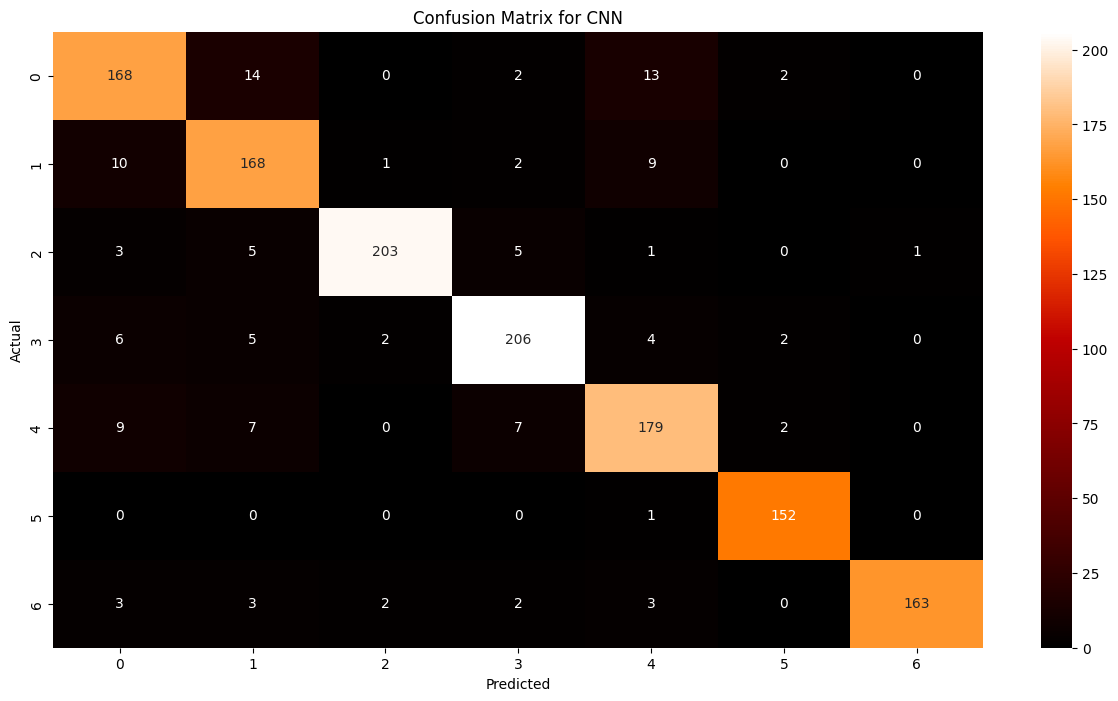

In [90]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_cnn, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for CNN")
plt.show()

### RNN Classifier

In [91]:
x_train = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)
# Define the RNN architecture
model_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(units=32, input_shape=(x_train.shape[1], 1)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=8, activation='softmax')
])

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
# Train the model on the training data
history = model.fit(x_train, keras.utils.to_categorical(y_train), epochs=20, batch_size=32, 
                    validation_data=(x_test, keras.utils.to_categorical(y_test)))

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(x_test, keras.utils.to_categorical(y_test))

Epoch 1/20
171/171 [==============================] - 3s 9ms/step - loss: 0.2296 - accuracy: 0.9188 - val_loss: 0.3279 - val_accuracy: 0.8850
Epoch 2/20
171/171 [==============================] - 1s 7ms/step - loss: 0.2017 - accuracy: 0.9280 - val_loss: 0.2651 - val_accuracy: 0.9077
Epoch 3/20
171/171 [==============================] - 1s 7ms/step - loss: 0.1920 - accuracy: 0.9355 - val_loss: 0.2736 - val_accuracy: 0.8982
Epoch 4/20
171/171 [==============================] - 1s 7ms/step - loss: 0.1916 - accuracy: 0.9324 - val_loss: 0.2792 - val_accuracy: 0.9026
Epoch 5/20
171/171 [==============================] - 2s 9ms/step - loss: 0.1695 - accuracy: 0.9430 - val_loss: 0.2583 - val_accuracy: 0.9114
Epoch 6/20
171/171 [==============================] - 1s 8ms/step - loss: 0.1702 - accuracy: 0.9362 - val_loss: 0.3037 - val_accuracy: 0.8952
Epoch 7/20
171/171 [==============================] - 1s 7ms/step - loss: 0.1527 - accuracy: 0.9456 - val_loss: 0.2626 - val_accuracy: 0.9150
Epoch 

In [93]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_test = np.argmax(keras.utils.to_categorical(y_test), axis=-1)

43/43 [==============================] - 0s 3ms/step


In [94]:
y_true = np.array(y_test)

In [95]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [96]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [97]:
results_rnn = pd.DataFrame(pd.DataFrame([['RNN Classifier', acc, f1, prec, rec,mse_val,rmse_val,mae_val,mape_val]],
columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [98]:
results= pd.concat([results, results_rnn], ignore_index=True)

43/43 [==============================] - 0s 4ms/step


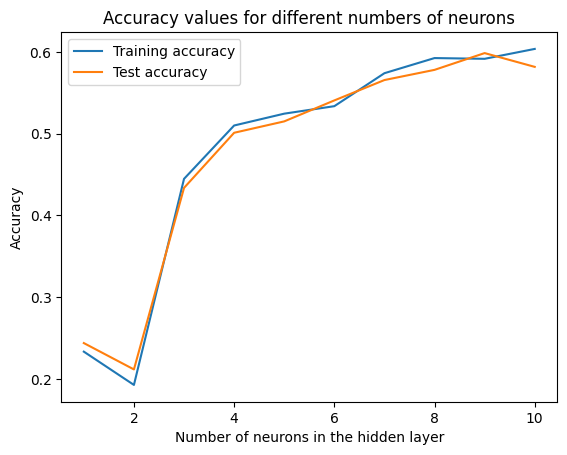

In [99]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_train = y_train.astype(int)
y_test = y_test.astype(int)

neuron_values = range(1, 11)

# Calculate accuracy for each number of neurons on training and test sets
train_accuracies = []
test_accuracies = []

for num_neurons in neuron_values:
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(units=num_neurons),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)
    y_train_pred = np.argmax(model.predict(x_train), axis=1)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_test_pred = np.argmax(model.predict(x_test), axis=1)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

plt.plot(neuron_values, train_accuracies, label='Training accuracy')
plt.plot(neuron_values, test_accuracies, label='Test accuracy')
plt.xlabel('Number of neurons in the hidden layer')
plt.ylabel('Accuracy')
plt.title('Accuracy values for different numbers of neurons')
plt.legend()
plt.show()

In [100]:
cm_rnn = confusion_matrix(y_true,y_pred)

In [101]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.79      0.86       199
           2       0.86      0.93      0.89       190
           3       0.97      0.96      0.97       218
           4       0.90      0.92      0.91       225
           5       0.89      0.88      0.89       204
           6       0.96      0.99      0.98       153
           7       0.96      0.98      0.97       176

    accuracy                           0.92      1365
   macro avg       0.92      0.92      0.92      1365
weighted avg       0.92      0.92      0.92      1365



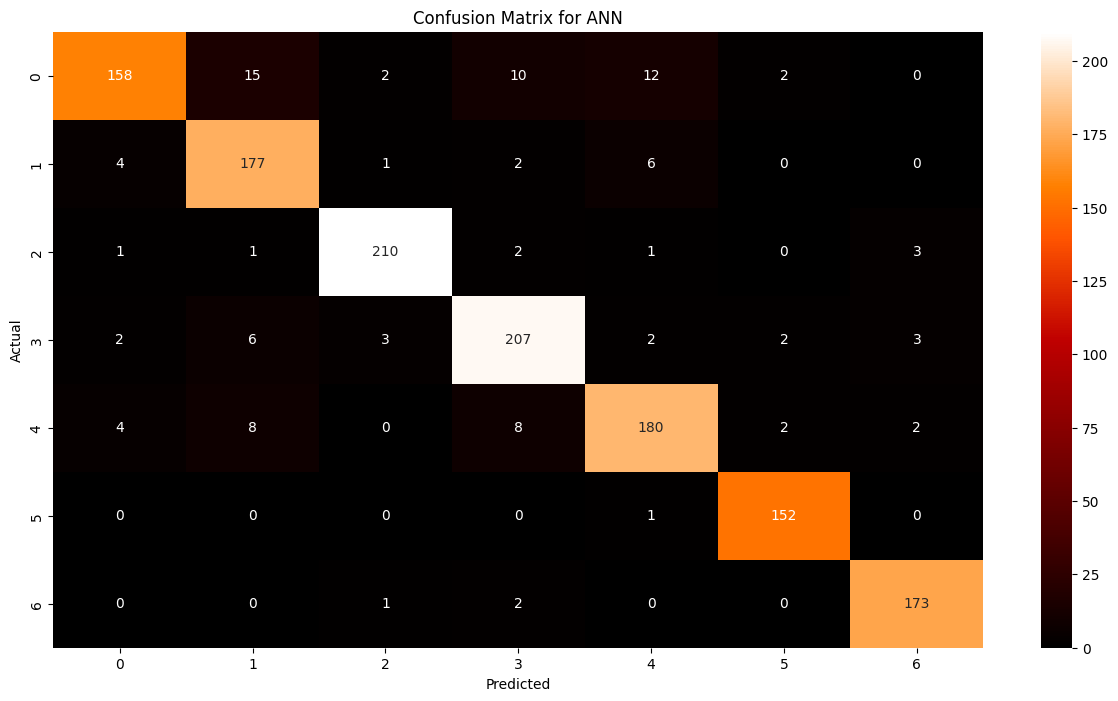

In [102]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_rnn, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for ANN")
plt.show()

### ANN Classifier

In [103]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(80,1)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=8, activation='softmax')
])

In [104]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, keras.utils.to_categorical(y_train), epochs=20, batch_size=32, 
                    validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
171/171 [==============================] - 2s 4ms/step - loss: 1.3909 - accuracy: 0.5954 - val_loss: 0.7700 - val_accuracy: 0.7297
Epoch 2/20
171/171 [==============================] - 0s 2ms/step - loss: 0.7049 - accuracy: 0.7574 - val_loss: 0.6596 - val_accuracy: 0.7641
Epoch 3/20
171/171 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.8047 - val_loss: 0.5840 - val_accuracy: 0.8029
Epoch 4/20
171/171 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.8246 - val_loss: 0.5162 - val_accuracy: 0.8132
Epoch 5/20
171/171 [==============================] - 0s 3ms/step - loss: 0.4962 - accuracy: 0.8299 - val_loss: 0.5735 - val_accuracy: 0.8059
Epoch 6/20
171/171 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8580 - val_loss: 0.4057 - val_accuracy: 0.8645
Epoch 7/20
171/171 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8494 - val_loss: 0.4423 - val_accuracy: 0.8432
Epoch 

In [105]:
test_loss, test_acc = model.evaluate(x_test, keras.utils.to_categorical(y_test))
print('Accuracy for ANN:', test_acc)

43/43 [==============================] - 0s 3ms/step - loss: 0.3362 - accuracy: 0.8791
Accuracy for ANN: 0.8791208863258362


In [106]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_test = np.argmax(keras.utils.to_categorical(y_test), axis=-1)

43/43 [==============================] - 0s 2ms/step


In [107]:
y_true = np.array(y_test)

In [108]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
prec = precision_score(y_test,y_pred,average='macro')
rec = recall_score(y_test,y_pred,average='macro')

In [109]:
mse_val = mse(y_true, y_pred)
rmse_val = rmse(y_true, y_pred)
mae_val = mae(y_true, y_pred)
mape_val = mape(y_true, y_pred)

In [110]:
results_ann = pd.DataFrame(pd.DataFrame([['ANN Classifier', acc, f1, prec, rec,mse_val,rmse_val,mae_val,mape_val]],
columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [111]:
results_ann

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,ANN Classifier,0.879121,0.882677,0.887089,0.880687,0.83663,0.914675,0.281319,10.386185


In [112]:
results= pd.concat([results, results_ann], ignore_index=True)

43/43 [==============================] - 0s 825us/step


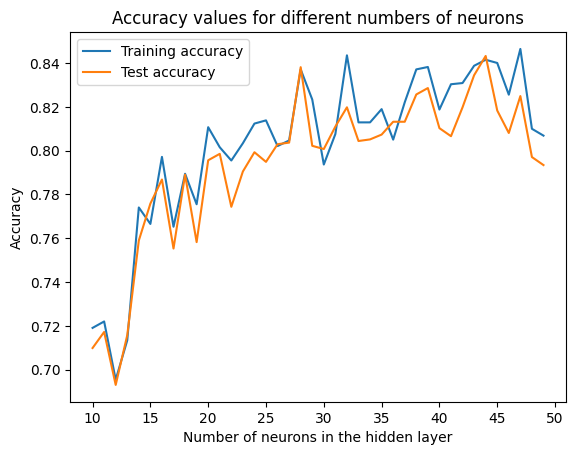

In [113]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

y_train = y_train.astype(int)
y_test = y_test.astype(int)

neuron_values = range(10,50)

# Calculate accuracy for each number of neurons on training and test sets
train_accuracies = []
test_accuracies = []

for num_neurons in neuron_values:
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_neurons, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)
    y_train_pred = np.argmax(model.predict(x_train), axis=1)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_test_pred = np.argmax(model.predict(x_test), axis=1)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

plt.plot(neuron_values, train_accuracies, label='Training accuracy')
plt.plot(neuron_values, test_accuracies, label='Test accuracy')
plt.xlabel('Number of neurons in the hidden layer')
plt.ylabel('Accuracy')
plt.title('Accuracy values for different numbers of neurons')
plt.legend()
plt.show()

In [114]:
cm_ann = confusion_matrix(y_true,y_pred)

In [115]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.88      0.82       199
           2       0.80      0.85      0.83       190
           3       0.96      0.93      0.94       218
           4       0.88      0.87      0.88       225
           5       0.84      0.78      0.81       204
           6       0.99      0.90      0.94       153
           7       0.97      0.96      0.96       176

    accuracy                           0.88      1365
   macro avg       0.89      0.88      0.88      1365
weighted avg       0.88      0.88      0.88      1365



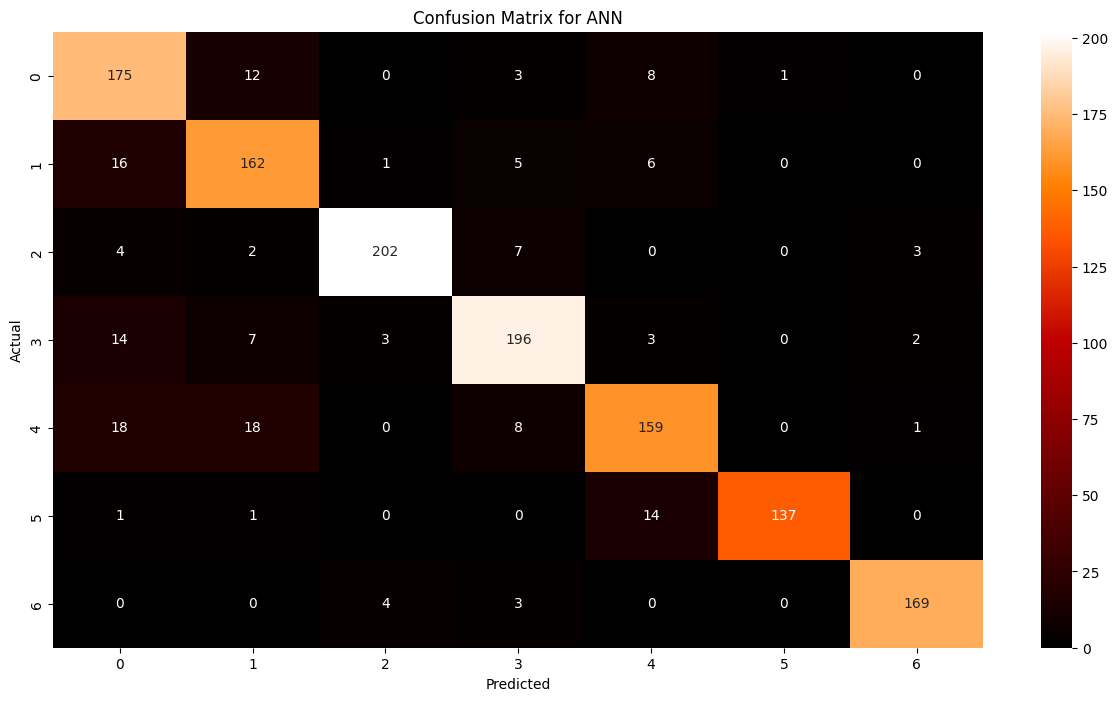

In [116]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_ann, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for ANN")
plt.show()

### RNN Classifier

In [117]:
# x_train = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
# x_test = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)
# # Define the RNN architecture
# model_rnn = keras.models.Sequential([
#     keras.layers.SimpleRNN(units=32, input_shape=(x_train.shape[1], 1)),
#     keras.layers.Dense(units=128, activation='relu'),
#     keras.layers.Dense(units=64, activation='relu'),
#     keras.layers.Dense(units=8, activation='softmax')
# ])

# # Compile the model with categorical crossentropy loss and Adam optimizer
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
# # Train the model on the training data
# history = model.fit(x_train, keras.utils.to_categorical(y_train), epochs=20, batch_size=32, 
#                     validation_data=(x_test, keras.utils.to_categorical(y_test)))

# # Evaluate the model on the testing data
# test_loss, test_acc = model.evaluate(x_test, keras.utils.to_categorical(y_test))


In [119]:
# y_pred = np.argmax(model.predict(x_test), axis=-1)
# y_test = np.argmax(keras.utils.to_categorical(y_test), axis=-1)

In [120]:
# y_true = np.array(y_test)

In [121]:
# acc = accuracy_score(y_test,y_pred)
# f1 = f1_score(y_test,y_pred,average='macro')
# prec = precision_score(y_test,y_pred,average='macro')
# rec = recall_score(y_test,y_pred,average='macro')

In [122]:
# mse_val = mse(y_true, y_pred)
# rmse_val = rmse(y_true, y_pred)
# mae_val = mae(y_true, y_pred)
# mape_val = mape(y_true, y_pred)

In [123]:
# results_rnn = pd.DataFrame(pd.DataFrame([['RNN Classifier', acc, f1, prec, rec,mse_val,rmse_val,mae_val,mape_val]],
# columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall','MSE','RMSE','MAE','MAPE']))

In [124]:
# results= pd.concat([results, results_rnn], ignore_index=True)

In [125]:
results

,Model,Accuracy,F1 Score,Precision,Recall,MSE,RMSE,MAE,MAPE
0,Random Forest,0.943728,0.945472,0.946253,0.945656,0.403283,0.635045,0.131301,5.331511
1,XGB Classifier,0.946659,0.948608,0.948954,0.948630,0.434936,0.659496,0.135991,4.984051
2,SVM Classifier,0.888628,0.892456,0.895140,0.892235,1.000000,1.000000,0.300117,10.987697
3,GNB Classifier,0.582649,0.582649,0.582649,0.582649,4.087339,2.021717,1.210434,46.547049
4,KNN Classifier,0.942556,0.943727,0.944344,0.944003,0.140680,0.663042,0.140680,5.052404
5,CNN Classifier,0.907692,0.910437,0.911402,0.910319,0.719414,0.848183,0.222711,10.312925
6,RNN Classifier,0.920879,0.922453,0.923249,0.923946,0.550916,0.742237,0.186081,10.859236
7,ANN Classifier,0.879121,0.882677,0.887089,0.880687,0.836630,0.914675,0.281319,10.386185
